# Clustering Project

## 1. Data Prep

In [1]:
# a. Read in the data file wholesale_clients.csv
import pandas as pd
data = pd.read_csv('../Data/wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
df = data.drop(columns=['Channel', 'Region'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [4]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [5]:
# c. Note the number of rows and columns
df.shape

(440, 6)

In [6]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data = std.fit_transform(df)

data = pd.DataFrame(data, columns = df.columns)

In [7]:
# e. Double check that all the column means are 0 and standard deviations are 1
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## 2. K-Means Clustering

In [8]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans


inertia_values =[]
for i in range(2,16):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

print(inertia_values)

[2266.9552665832452, 1644.0598512347563, 1326.674608213553, 1070.2551995135614, 989.3326418885058, 856.7070228388118, 791.8280762163156, 710.1943394067519, 668.22250548469, 558.74085188741, 535.5554009683509, 525.7968263157035, 507.1086713648479, 477.21988444873165]


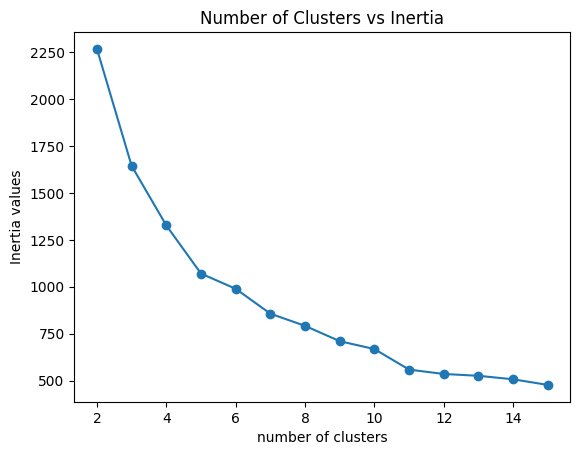

In [9]:
# b. Create an inertia plot
import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index = range(2,16))

inertia_series.plot(marker = 'o')

plt.title('Number of Clusters vs Inertia')
plt.xlabel('number of clusters')
plt.ylabel('Inertia values')
plt.show()

In [10]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
# looks like k = 1000

kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data)
kmeans5.labels_

array([3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [11]:
kmeans5.cluster_centers_

array([[-0.51381889,  0.64560212,  0.8982647 , -0.34063818,  0.9066611 ,
         0.04754206],
       [ 1.75638561, -0.12828154, -0.2192582 ,  0.85450532, -0.40434072,
         0.34325902],
       [ 0.38872897,  3.94304862,  4.02164626,  0.03578413,  4.22611641,
         0.94163573],
       [-0.22861348, -0.38400258, -0.43904531, -0.13576388, -0.39991848,
        -0.19523025],
       [ 1.80335587,  3.33298726,  0.9425185 ,  9.4098007 , -0.44640902,
         8.96415723]])

In [12]:
cluster_centers = pd.DataFrame(kmeans5.cluster_centers_,columns=data.columns )

In [13]:
cluster_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.513819,0.645602,0.898265,-0.340638,0.906661,0.047542
1,1.756386,-0.128282,-0.219258,0.854505,-0.404341,0.343259
2,0.388729,3.943049,4.021646,0.035784,4.226116,0.941636
3,-0.228613,-0.384003,-0.439045,-0.135764,-0.399918,-0.195230
4,1.803356,3.332987,0.942519,9.409801,-0.446409,8.964157


In [14]:
# d. Find the number of clients in each cluster
from collections import Counter
Counter(kmeans5.labels_)

Counter({np.int32(3): 272,
         np.int32(0): 96,
         np.int32(1): 59,
         np.int32(2): 11,
         np.int32(4): 2})

<Axes: >

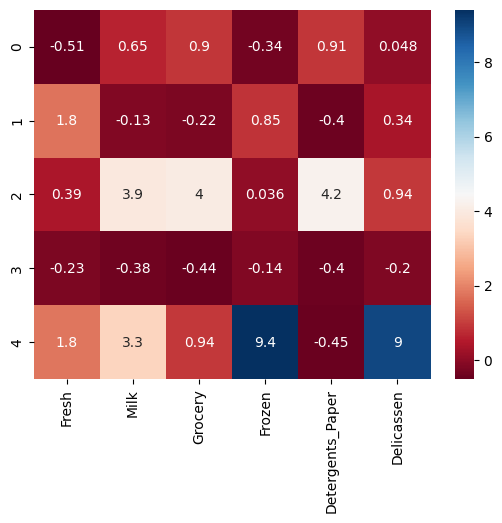

In [15]:
# e. Create a heat map of the cluster centers
import seaborn as sns

sns.heatmap(cluster_centers, cmap='RdBu', annot = True)

In [16]:
# f. Name the clusters

* Cluster 0: More milk, grocery and paper materials
* Cluster 1: More fresh and frozen
* Cluster 2: More of Everything
* Cluster 3: Little of Everything
* Cluster 4: Lots of Frozen and Deli

In [17]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 'auto', random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_, metric = 'euclidean', sample_size=None))

silhouette_scores

[0.3998278091730005,
 0.4582633767207058,
 0.34939129340421093,
 0.36890127429678043,
 0.2762464573058837,
 0.276678268663421,
 0.32366546538940916,
 0.29453704649783113,
 0.22876866444760022,
 0.29510219162877355,
 0.25879825581218474,
 0.259217320431312,
 0.25852614165924853,
 0.2642750070877525]

<Axes: >

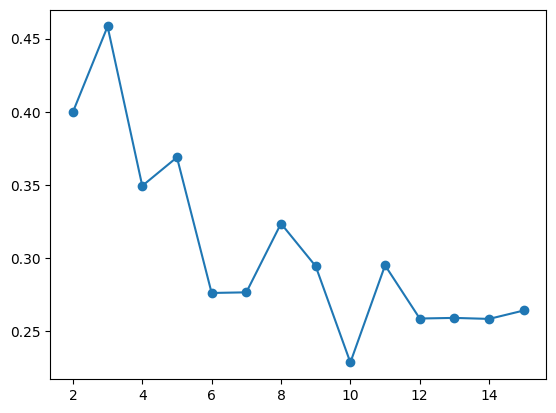

In [18]:
silhoutte_series = pd.Series(silhouette_scores, index= range(2,16))
silhoutte_series.plot(marker = 'o')

In [19]:
# h. Extra credit: fit two models with the number of clusters for the two highest silhouette scores and name the clusters

# k=3
kmeans3 = KMeans(n_clusters=3, n_init = 'auto', random_state=42)
kmeans3.fit(data)
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns = data.columns)
cluster_centers3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077
1,1.784209,0.008694,-0.192645,1.396080,-0.398960,0.759479
2,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741


<Axes: >

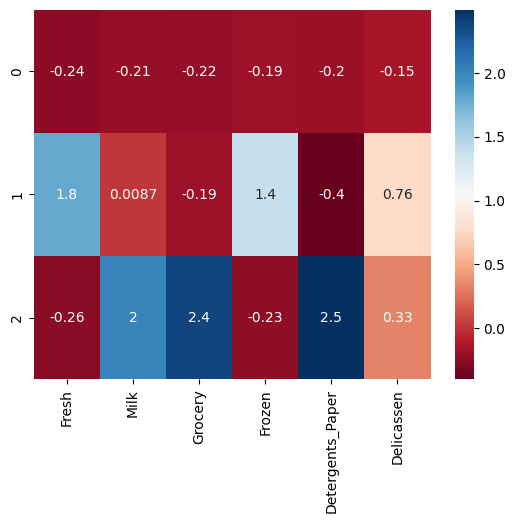

In [20]:
sns.heatmap(cluster_centers3, cmap = 'RdBu', annot = True)

## 3. Hierarchical Clustering

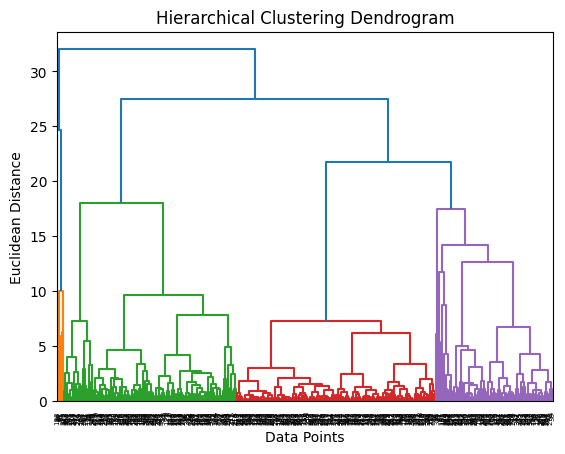

In [21]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method = 'ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

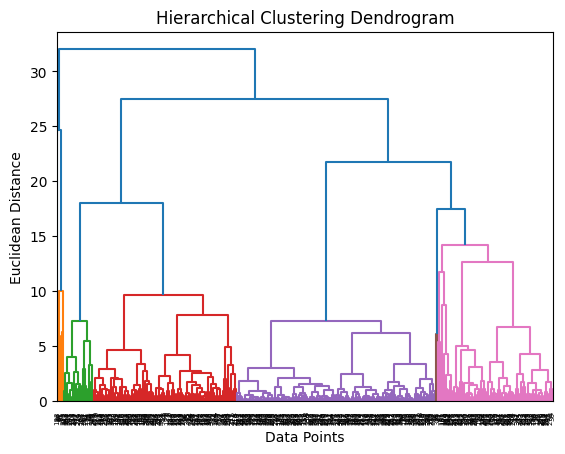

In [22]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary
dendrogram_info = dendrogram(linkage_matrix, color_threshold=15)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [23]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(5)
agg.fit(data)
Counter(agg.labels_)


Counter({np.int64(4): 177,
         np.int64(0): 153,
         np.int64(2): 104,
         np.int64(1): 5,
         np.int64(3): 1})

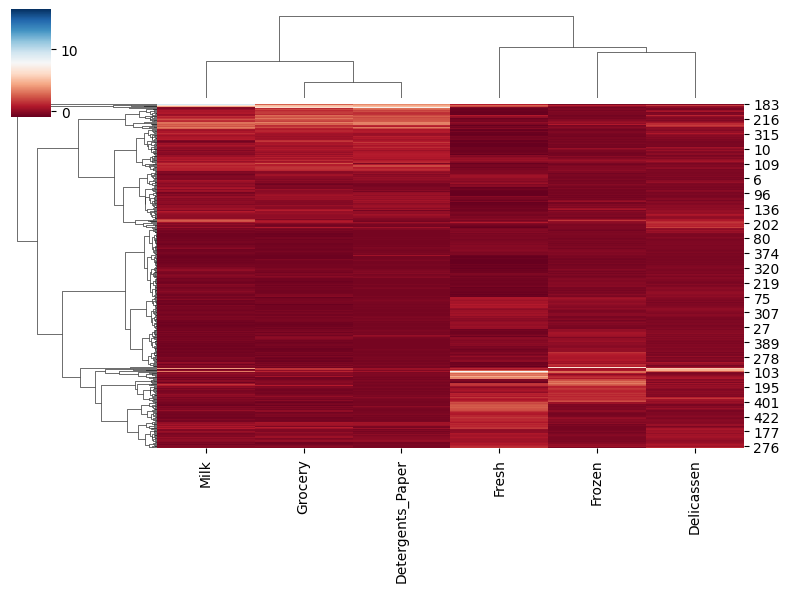

In [24]:
# d. Create a cluster map of the model you just fit
sns.clustermap(data, method = 'ward', cmap= 'RdBu', figsize=(8, 6), xticklabels=data.columns)

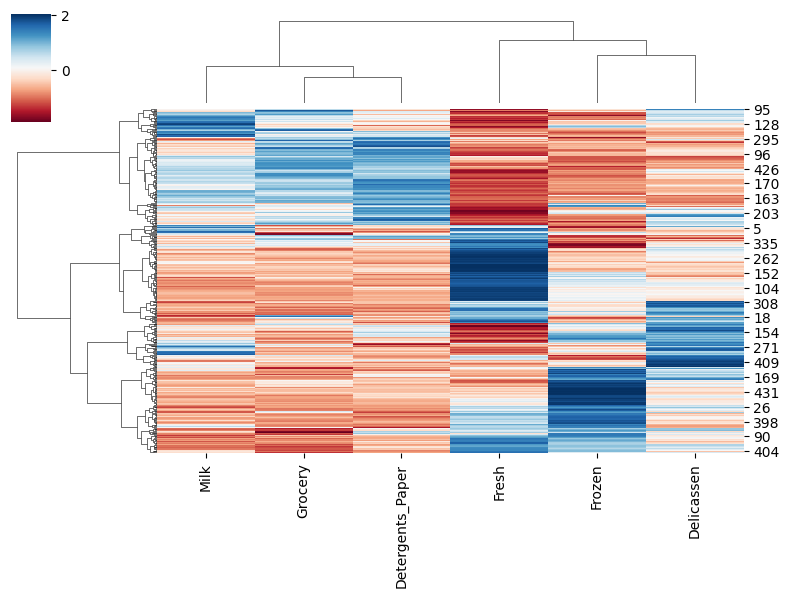

In [25]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
sns.clustermap(data, method = 'ward', cmap= 'RdBu', z_score=0, figsize=(8, 6), xticklabels=data.columns)

In [26]:
# f. Extra credit: write a loop to view the silhouette score for 2 to 20 clusters


In [27]:
# g. Extra credit: fit a model with the number of clusters for the highest silhouette score


## 4. DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

In [41]:
# a. Copy over the tune_dbscan function from the demo code
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [43]:
# b. Apply the dbscan function on the scaled data
dbscan_results = tune_dbscan(data)
dbscan_results

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN
...,...,...,...,...,...
147,1.9,5,1,15,NaN
148,1.9,6,1,18,NaN
149,1.9,7,1,18,NaN
150,1.9,8,1,19,NaN


In [45]:
# c. Sort the data by highest silhouette score
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
96,1.3,2,3,25,0.424572
97,1.3,3,3,25,0.424572
105,1.4,3,3,23,0.423547
...,...,...,...,...,...
147,1.9,5,1,15,NaN
148,1.9,6,1,18,NaN
149,1.9,7,1,18,NaN
150,1.9,8,1,19,NaN


In [46]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)
def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [47]:
# e. Try applying the function again and view the top silhouette scores
dbscan_results_2 = tune_dbscan(data)
dbscan_results_2.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
256,3.3,2,2,8,0.740284
248,3.2,2,2,8,0.740284
264,3.4,2,2,8,0.740284
272,3.5,2,2,8,0.740284
200,2.6,2,2,10,0.582247
...,...,...,...,...,...
387,4.9,5,1,5,NaN
388,4.9,6,1,5,NaN
389,4.9,7,1,5,NaN
390,4.9,8,1,6,NaN


In [49]:
# view one result for each silhouette score value
(dbscan_results_2.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
256,3.3,2,2,8,0.740284
200,2.6,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
240,3.1,2,3,8,0.577890
97,1.3,3,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271
89,1.2,3,2,32,0.419507
81,1.1,3,2,40,0.417466


In [ ]:
# f. Fit a DBSCAN model on the scaled data set with the best eps + min_samples values and view the number of data points in each cluster

dbscan_best = DBSCAN(eps = 3.5, min_samples=2 )

dbscan_best.fit(data)


,eps,3.5
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [51]:
# number of data points in each cluster
Counter(dbscan_best.labels_)

Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})

## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters
5. DBSCAN with 2 clusters

In [52]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [53]:
# Kmeans 3

print_metrics(kmeans3, data)

KMeans(n_clusters=3, random_state=42)
Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})
0.4582633767207058


In [54]:
# Kmeans 5 

print_metrics(kmeans5, data)

KMeans(n_clusters=5, random_state=42)
Counter({np.int32(3): 272, np.int32(0): 96, np.int32(1): 59, np.int32(2): 11, np.int32(4): 2})
0.36890127429678043


In [56]:
# Hiearchical Clustering with 5 clusters
print_metrics(agg,data)

AgglomerativeClustering(n_clusters=5)
Counter({np.int64(4): 177, np.int64(0): 153, np.int64(2): 104, np.int64(1): 5, np.int64(3): 1})
0.23988371669170097


In [58]:
print_metrics(dbscan_best, data)

DBSCAN(eps=3.5, min_samples=2)
Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})
0.740283564230615


## 6. Recommend Client Segments

In [62]:
# a. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3.cluster_centers_

array([[-0.24260351, -0.21266148, -0.22157224, -0.18656872, -0.20323381,
        -0.15007652],
       [ 1.78420858,  0.00869407, -0.19264494,  1.39607954, -0.39896023,
         0.75947859],
       [-0.26086015,  1.99920893,  2.37190452, -0.23495033,  2.49396554,
         0.33174095]])

In [63]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns = data.columns)

In [64]:
cluster_centers3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077
1,1.784209,0.008694,-0.192645,1.396080,-0.398960,0.759479
2,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741


<Axes: >

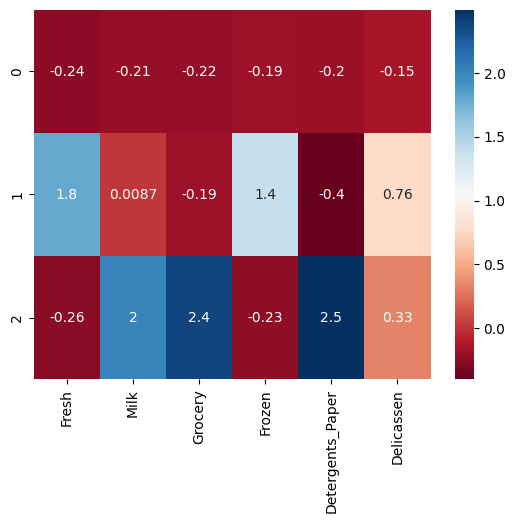

In [65]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients
sns.heatmap(cluster_centers3, cmap='RdBu', annot = True)

## 7. Predict the Cluster of a New Client

In [59]:
# a. Given this new client, determine which cluster they fall into
import pandas as pd
import numpy as np

new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [66]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(std.transform(new_client), columns= data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [68]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_scaled)

array([2], dtype=int32)

In [40]:
# d. Which cluster does the new client belong to?
